# 9.1 Clustering & Classfication

* Classfication: One type of supervised learning that classify new data into similar group when labels are given
* Clustering: One type of unsupervised learning that cluster new data into similar group when labels are not given


# K-NN algorithm
* 분류 알고리즘 중에서 가장 간단하면서도 직관적으로 이해하기 쉬운 알고리즘
* 예를 들어 닥스훈트와 진돗개라는 종이 있는데, 두 종은 몸의 높이와 길이 비율이 다르다.
* 우리는 모통의 길이와 높이라는 feature을 각각 x1, x2 라고 두고 이 개들의 표본 집합에 대하여 x1, x2를 측정한다.
* 이러한 데이터를 이용하여 효과적으로 새로운 종에 대해 분류를 하려면 어떤 기법을 적용 하는 것이 바람직할까?
## k-NN 알고리즘
* k-NN은 k-Neariest Neighbor의 약자로 특징 공간에 분포하는 데이터에 대하여 k개의 가장 가까운 이웃을 살펴보고 다수결 방식으로 데이터의 레이블을 할당하는 분류 방식이다
* k-NN  알고리즘은 k의 값에 따라 결과가 달라지는 특징이 있다. 만약 k=4 이면 2개의 녹색 점과 2개의 빨간색 원이 가장 가까운 그룹이므로 판정이 어려울 수 있다.
* 하지만, k가 짝수이고 가장 가까운 클래스 A와 클래스 B의 개수가 같은 경우에도 오각형 새 데이터의 클래스를 판정하는 방법이 있는데 이것은 단순히 이웃의 수를 계산하는 것이 아니라 이웃과의 거리에 가중치를 부여하는 모델로 만들 수 있다.
* 즉, 새 멤버와 가까운 위치에 있는 점들은 더 낮은 가중치를 얻고, 먼 도형들은 더 높은 가중치를 가지도록 한다.
* 이 그림에서는 w1+w2 > w3+w4이므로 가중치의 합이 낮은 값을 기준으로 클래스B로 분류하는 방법이 있을 수 있다.
* k-NN 방법은 특징 공간에 있는 모든 데이터에 대한 정보가 필요하다. 따라서 데이터 인스턴스, 클래스, 특징의 요소들의 개수가 많다면, 많은 메모리 공간과 계산 시간이 필요하다는 단점이 있다!
* 반면에 알고리즘이 매우 단순하고 직관적이며, 사전 학습이나 특별한 준비 시간이 필요 없다는 점은 장점이다!

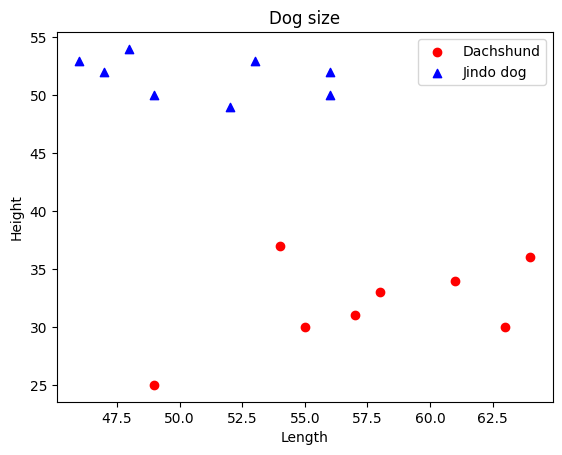

In [1]:
# Visualize data using matplotlib
import matplotlib.pyplot as plt
import numpy as np

dach_length=[55,57,64,63,58,49,54,61]
dach_height=[30,31,36,30,33,25,37,34]

jin_length=[56,47,56,46,49,53,52,48]
jin_height=[52,52,50,53,50,53,49,54]

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height, c='b', marker='^', label='Jindo dog')
plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc='upper right')


* 이제 길이와 높이가 각각 59, 35인 새로운 데이터가 들어왔고 이 특징을 가진 개의 종류를 모를 경우, 이 데이터는 닥스훈트와 진돗개 중에서 어떤 개로 분류하는 것이 바람직할지 살펴보자.


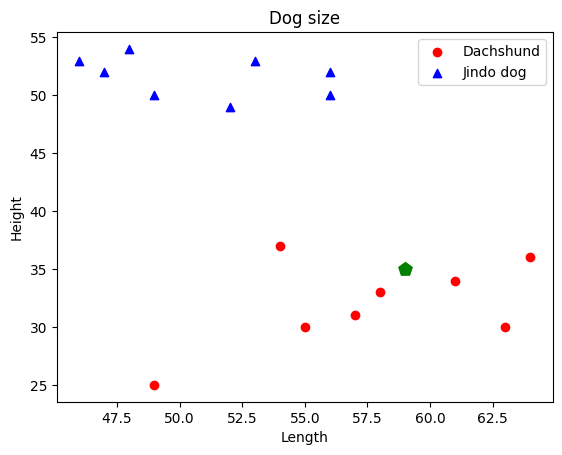

In [8]:
plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height, c='b', marker='^', label='Jindo dog')
plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc='upper right')

newdata_length=[59]
newdata_height=[35]

plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='g', label='new Data')

* 위의 그림으로 보니 새 데이터의 가까이에 있는 점들이 대부분 닥스훈트 클래스로 보인다.
* 이제 k-NN 알고리즘을 적용하여 새로운 데이터를 닥스훈트 클래스로 잘 분류하는가 살펴보도록 하자.
1. 준비된 데이터에 k-NN 알고리즘을 적용해 보자.
2. 우선 모델의 훈련을 위해서 다음과 같은 방법으로 닥스훈트의 몸길이 dach_length와 몸 높이 dach_height 배열 데이터를 묶어서 [몸길이1, 몸높이1], [몸길이2, 몸높이2]..... 와 같은 형태의 항목을 가지는 d_data 배열을 만들어 보자.
3. 다음으로 이 d_data 배열의 크기와 같은 0으로 이루어진 배열[0,0,...]을 만들어보자.
4. 이렇게 하면 d_label의 크기는 d_data의 크기와 같다.



In [9]:
d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data)) # label dachshund as 0

j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data)) # label jindo dog as 1

newdata = [[59, 35]]

* 마지막으로 k 값을 각각 3으로 두고 몸통 길이가 59, 높이가 35인 개를 어떤 품종으로 분류하는가를 살펴보자

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))
dog_classes = {0:'Dachshund', 1:'Jindo dog'}
k = 3 # set k as 3 and make kNN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('Data', newdata, 'is predicted as', dog_classes[y_pred[0]])

Data [[59, 35]] is predicted as Dachshund


# 9.4 k-NN Example iris
* Iris has three types which are Versicolor, Setosa, Virginica
* 우리는 꽃받침과 꽃잎의 크기를 측정한 데이터를 기반으로 새로운 종을 분류하는 k-NN 모델을 구축하여 한다.
* 데이터 세트는 사이킷런에서 제공하며, load_iris() 함수로 불러올 수 있다.

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.data[:3] # print first 3 data values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

* As a result, data has 4 features which are sepal length, sepal width, petal length and petal width measured in metric.

In [12]:
print('iris data shape:', iris.data.shape)
print('iris datas features:', iris.feature_names)
print('iris data\'s label:', iris.target)

iris data shape: (150, 4)
iris datas features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris data's label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


* As a result, iris is data of 4 columns and 150 rows.
* Also, it has 0, 1, 2 as 50 each which means setosa, versicolor, virginica.
* Now convert numpy\'s multi-dimensional array to Pandas\'s DataFrame.

In [13]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
iris_df['target'].value_counts()

,count
target,
0,50
1,50
2,50


In [15]:
iris_df.values

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

* Now before applying k-NN algorithm, divide iris_df.values(numpy multi-d array) into x(input) and y(label).

In [16]:
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

* Split X and y with train_test_split() function and caculate how precise our model is.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def iris_knn(X, y, k):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return metrics.accuracy_score(y_test, y_pred)

k = 3
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일 때 정확도: {1:.3f}'.format(k, scores))

m = 10
scores = iris_knn(X, y, m)
print('n_neighbors가 {0:d}일 때 정확도: {1:.3f}'.format(m, scores))

n_neighbors가 3일 때 정확도: 0.933
n_neighbors가 10일 때 정확도: 0.956


# Effects of Changing k in k-NN
## Small k (e.g., k=1, k=3)

* Low bias, high variance: The model captures noise and outliers more easily, leading to overfitting.
More sensitive to small variations in data.
Decision boundaries are more complex and irregular.

## Large k (e.g., k=10, k=20)

* Higher bias, lower variance: The model becomes more generalized and less sensitive to noise.
Smoother decision boundaries, reducing the risk of overfitting.
Can cause underfitting if k is too large, as it averages too many points and loses fine details.
Choosing the Best k
Typically, odd values are used to avoid ties in classification.
Cross-validation helps find the best k.
A rule of thumb: k ≈ sqrt(N) (where N is the total number of data points).
Would you like a visualization of how different k values affect decision boundaries?


## Bias and Variance in k-NN
Bias and variance are fundamental concepts in machine learning that describe how well a model learns from data and generalizes to new data.

1. Bias (Error from wrong assumptions)
Bias is the difference between the predicted values and the actual values.
High bias means the model makes strong assumptions and oversimplifies the data (underfitting).
Low bias means the model closely follows the data, capturing its patterns.

* In k-NN:
  * Small k (e.g., k=1, k=3) → Low bias (since the model follows the data closely).
  * Large k (e.g., k=20, k=50) → High bias (as it smooths out details and generalizes more).

2. Variance (Error from sensitivity to small fluctuations)
Variance measures how much the model’s predictions change if the training data changes.
High variance means the model is too sensitive to minor details in the data (overfitting).
Low variance means the model is more stable but may miss important patterns.

* In k-NN:
  * Small k → High variance (model is sensitive to small changes in training data).
  * Large k → Low variance (model is more stable and generalizes better).

## Bias-Variance Tradeoff in k-NN
* Small k → Low bias, high variance (overfitting).
* Large k → High bias, low variance (underfitting).
* The best k balances bias and variance to minimize total error.

In [2]:
# Apply model to new data
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

k = 3
iris = load_iris()
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=3)

In [18]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

# New data
X = [[4,2,1.3,0.4], [4,3,3.2,2.2]]
y = knn.predict(X)

print('{} 특성을 가지는 품종: {}'.format(X[0], classes[y[0]]))
print('{} 특성을 가지는 품종: {}'.format(X[1], classes[y[1]]))

ValueError: X has 4 features, but KNeighborsClassifier is expecting 2 features as input.

* As you can see in the output, k-NN classifier predicted new data based on their feature value.
* To know preciseness of classifier, we can not use accuracy_score() function.


# 9.7 게임을 하는 고객을 분류해 보자
## 게임 사용자의 성향을 다음과 같이 네 종류로 나누어 봄
1. 게임을 오래하고 게임 레벨도 높은 고객
2. 게임을 오래하고도 게임 레벨이 낮은 고객
3. 게임을 짧게하지만 게임 레벨이 높은 고객
4. 게임을 짧게하고 게임 레벨도 낮은 고객
* 이러한 데이터의 경우 애초부터 4가지 종류의 고객에 대한 레이블링이 없다. 우리는 이 두가지의 속성을 바탕으로 고객을 군집화하여야 하는데 이를 위해서 필요한 방법이 바로 k-평균 알고리즘이다.

# k-평균 알고리즘
* 원리가 단순하고 직관적이며 성능이 좋은 군집화 알고리즘이다.
* 그러나 사전에 군집의 개수 k 값을 지정해야 하는 단점이 있다.

# 9.8 데이터 전처리의 필요성

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')
game_usage.head(3)

,time spent,game level
0,39,944
1,55,705
2,29,757


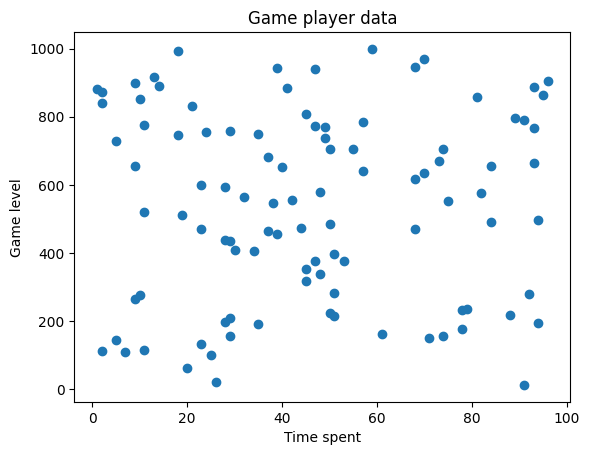

In [23]:
X = game_usage['time spent']
Y = game_usage['game level']

# scatter plot
plt.title('Game player data')
plt.xlabel('Time spent')
plt.ylabel('Game level')
plt.scatter(X, Y)

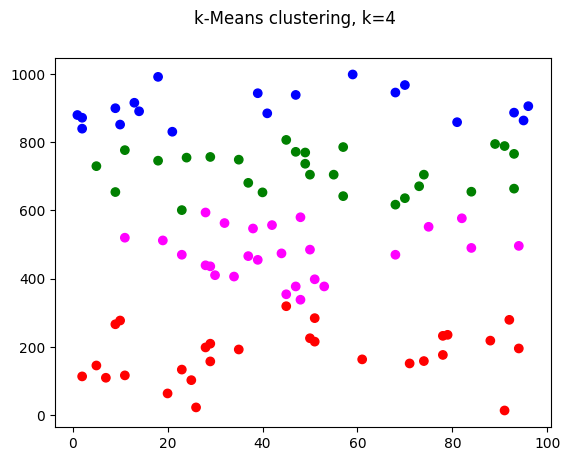

In [25]:
# Classify this data into 4 cluster with k-Means clustering
from sklearn import cluster

def kmeans_predict_plot(data, k):
  model = cluster.KMeans(n_clusters=k)
  model.fit(data)
  labels = model.predict(data)
  colors = np.array(['red', 'green', 'blue', 'magenta'])
  plt.suptitle('k-Means clustering, k={}'.format(k))
  plt.scatter(data[:, 0], data[:,1], color=colors[labels])

gamer_data = np.column_stack((X,Y))
kmeans_predict_plot(gamer_data, k=4)

(0.0, 1000.0)

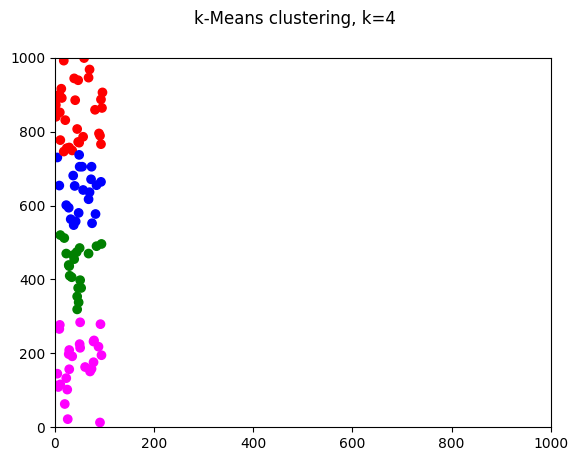

In [27]:
kmeans_predict_plot(gamer_data, k =4)
plt.xlim(0, 1000); plt.ylim(0,1000)

# 데이터 정규화(normalization) 방법을 이용하자
* 앞서 다룬 게임 이용자의 데이터를 살펴보면 게임 이용 시간은 0에서 100 사이의 값들이지만 게임 레벨은 0에서 1,000 사이의 값들이다.
* 이렇게 값의 범위가 크게 다른 특징들을 입력 변수로 사용할 경우 앞 절에서 살펴본 바와 같이 게임 레벨 값에 의해서만 분류가 일어나게 된다.
* 그 이유는 K-평균 알고리즘이 거리값을 기준으로 가까운 값을 같은 군집으로 보기 때문이다.
* 이 때문에 적절한 군집화가 이루어지지 않을 수도 있다. 그래서 각각의 특징들이 갖는 값들을 동일한 규모로 변경하는 작업이 필요할 수 있다.
* 이때 각 데이터를 정규화(normalization)하는 방법이 있는데 정규화는 모든 데이터를 0에서 1 사이의 값이 되도록 하는 것이다.
* 입력 데이터를 모두 이러한 방식으로 정규화 하면 모든 데이터는 0에서 1사이의 값을 갖게 된다.
* 사이킷런에는 학습 전에 데이터를 정제하기 위한 정규화 클래스가 제공된다. 이것이 바로 preprocessing 서브 모듈에 있는 MinMaxScaler 클래스이다.

In [28]:
from sklearn.preprocessing import MinMaxScaler
sclaer = MinMaxScaler() # Create min-max sclaer object
sclaer.fit(gamer_data) # Fit gamer_data
n_data = sclaer.transform(gamer_data) # gamer_data to 0-1
n_data[:, 0].mean(), n_data[:,1].mean()

(0.4731578947368421, 0.5324949290060852)

In [30]:
n_data[:,0].min(), n_data[:,0].max() # min & max value of first row

(0.0, 1.0)

In [31]:
n_data[:,1].min(), n_data[:,1].max() # min & max value of second row

(0.0, 1.0)

* 이제 정규화된 데이터에 대하여 4개의 군집으로 나누는 작업을 해 보도록 하자.
* 이번에는 다음과 같이 게임 사용 시간과 게임 레벨 특성에 따라 군집화가 이루어지는 것을 확인할 수 있다.
* 군집화에서 초기에 선택되는 점들은 임의의 점들이므로 여러분의 실행 결과는 아래와 완전히 일치하지 않을 수 있다.

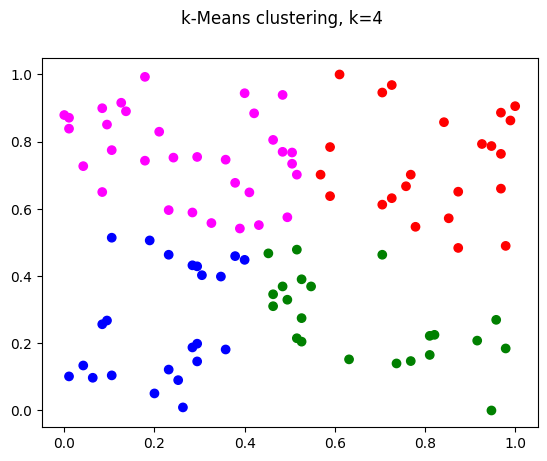

In [32]:
kmeans_predict_plot(n_data, k=4) # Create 4 clusters

# 9.10 다양한 스케일러 살펴보기
* 데이터를 정제하는 또 다른 방법은 표준화(standardization)이다.
* 표준화는 데이터를 정제할 때 전체의 평균과 분산을 사용한다.
* 이 변환이 이루어지면 평균이 0이고 분산이 1인 데이터가 된다.

In [33]:
import numpy as np
a = np.array([10, 8, 10, 8,8,4])
print('Total:', a.sum())
print('Mean:', a.mean())
print('Variance:', a.var())
print('Standard deviation:', a.std())

Total: 48
Mean: 8.0
Variance: 4.0
Standard deviation: 2.0


## 사이킷런에서 제공하는 스케일러
1. StandardSclaer: 평균과 표준편차를 이용하는 기본적인 스케일러
2. MinMaxSclaer: 최대값이 1, 최소값이 0이 되도록 스케일링함
3. MaxAbsSclaer: 최대 절대값이 1, 최소값이 0이 되도록 스케일링함
4. RobustSclaer: 중앙값과 IQR을 사용하여 이상치의 영향을 최소화하여 스케일링함.

In [36]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(gamer_data)
gamer_data_scaled = standardScaler.transform(gamer_data)

gamer_data_scaled[:, 0].std(), gamer_data_scaled[:,1].mean()

(1.0000000000000002, 1.1546319456101628e-16)